In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Superstore_Orders.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Check for missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [ ]:
# Drop rows with missing Order Date
df = df.dropna(subset=['Order Date'])

In [ ]:
# Check for duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Extract useful time features
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [3]:
profit_summary = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
profit_summary['Profit Margin (%)'] = (profit_summary['Profit'] / profit_summary['Sales']) * 100
profit_summary.sort_values(by='Profit Margin (%)', ascending=True)

,Category,Sub-Category,Sales,Profit,Profit Margin (%)
3,Furniture,Tables,206965.5320,-17725.4811,-8.564460
0,Furniture,Bookcases,114879.9963,-3472.5560,-3.022768
12,Office Supplies,Supplies,46673.5380,-1189.0995,-2.547695
15,Technology,Machines,189238.6310,3384.7569,1.788618
1,Furniture,Chairs,328449.1030,26590.1663,8.095673
11,Office Supplies,Storage,223843.6080,21278.8264,9.506113
16,Technology,Phones,330007.0540,44515.7306,13.489327
2,Furniture,Furnishings,91705.1640,13059.1436,14.240358
6,Office Supplies,Binders,203412.7330,30221.7633,14.857361
4,Office Supplies,Appliances,107532.1610,18138.0054,16.867517


<ipython-input-4-024f35e15671>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_summary.sort_values(by='Profit Margin (%)', ascending=False),


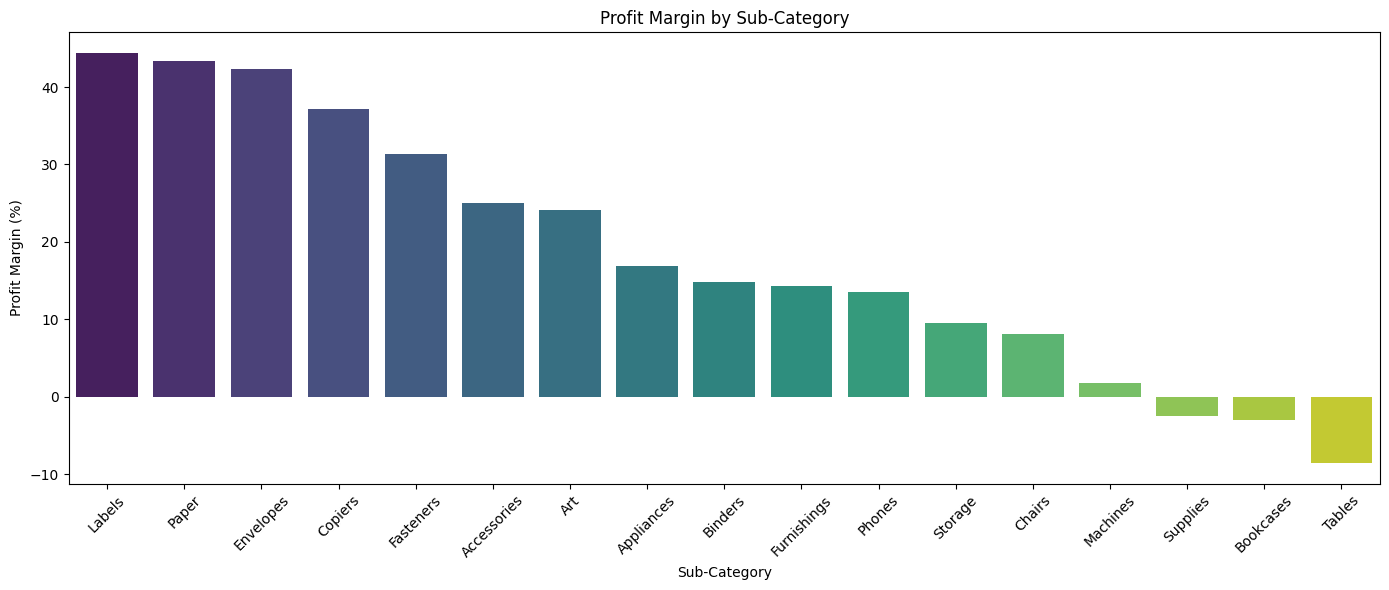

In [4]:
plt.figure(figsize=(14,6))
sns.barplot(data=profit_summary.sort_values(by='Profit Margin (%)', ascending=False),
            x='Sub-Category', y='Profit Margin (%)', palette='viridis')
plt.xticks(rotation=45)
plt.title('Profit Margin by Sub-Category')
plt.tight_layout()
plt.show()

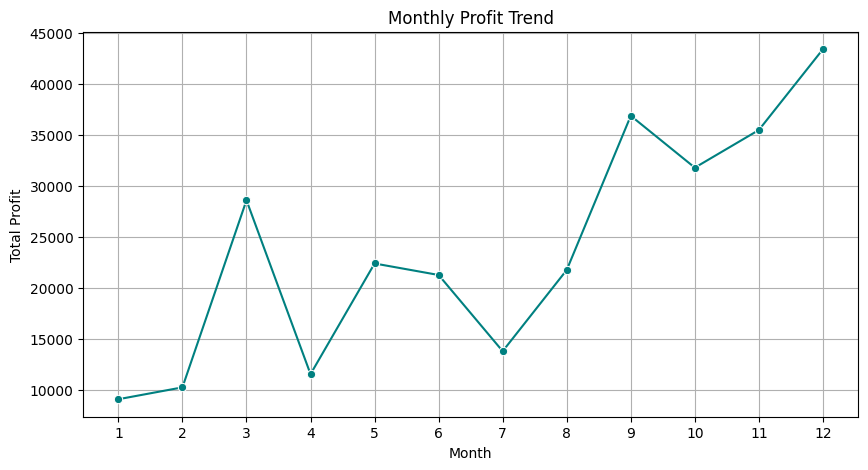

In [5]:
monthly_profit = df.groupby('Month')['Profit'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_profit, x='Month', y='Profit', marker='o', color='teal')
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

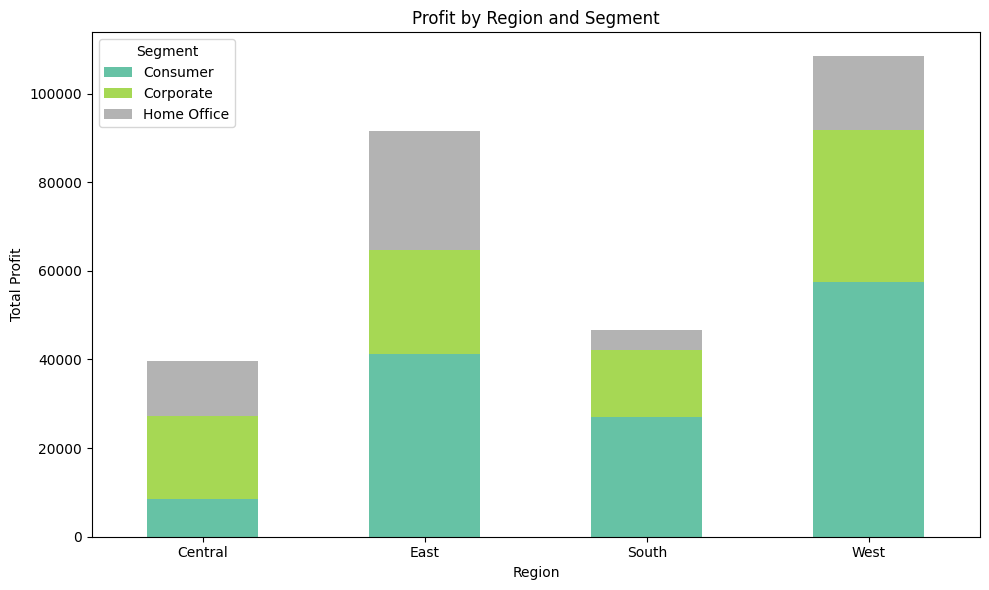

In [6]:
region_profit = df.groupby(['Region', 'Segment'])['Profit'].sum().unstack().fillna(0)
region_profit.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Profit by Region and Segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

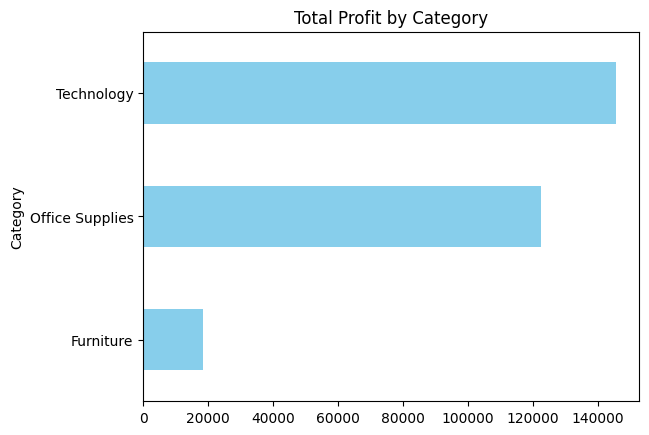

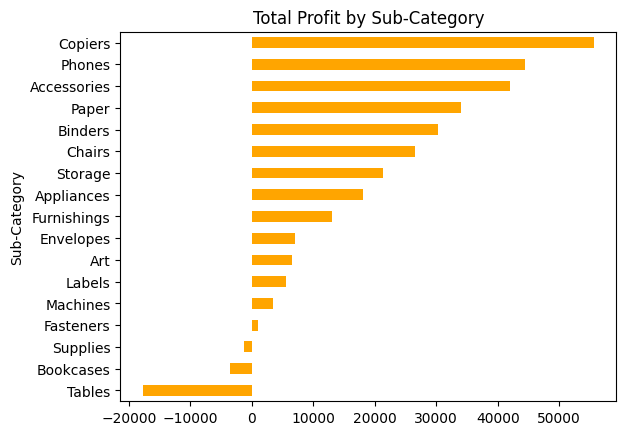

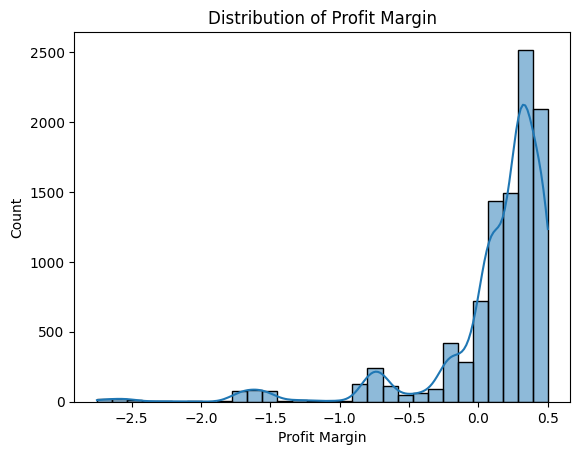

In [7]:
# Profitability by Category
category_profit = df.groupby('Category')['Profit'].sum().sort_values()
category_profit.plot(kind='barh', title='Total Profit by Category', color='skyblue')
plt.show()

# Sub-category profitability
sub_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sub_profit.plot(kind='barh', title='Total Profit by Sub-Category', color='orange')
plt.show()

# Create Profit Margin column
df['Profit Margin'] = df['Profit'] / df['Sales']

# Profit Margin Distribution
sns.histplot(df['Profit Margin'].dropna(), bins=30, kde=True)
plt.title('Distribution of Profit Margin')
plt.show()

In [8]:
import sqlite3

# Create in-memory SQLite DB
conn = sqlite3.connect(':memory:')
df.to_sql('superstore', conn, index=False, if_exists='replace')

# Sample SQL: Profit by Category
query = '''
SELECT Category, ROUND(SUM(Profit), 2) AS Total_Profit
FROM superstore
GROUP BY Category
ORDER BY Total_Profit ASC
'''
pd.read_sql(query, conn)

,Category,Total_Profit
0,Furniture,18451.27
1,Office Supplies,122490.80
2,Technology,145454.95


In [9]:
df.to_csv('Superstore_Cleaned.csv', index=False)

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [11]:
df['Profit Margin'] = df['Profit'] / df['Sales']

In [12]:
df['Inventory Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [13]:
df = df[df['Inventory Days'] > 0]


In [14]:
correlation = df[['Inventory Days', 'Profit Margin']].corr()
print("Correlation between Inventory Days and Profit Margin:")
print(correlation)

Correlation between Inventory Days and Profit Margin:
                Inventory Days  Profit Margin
Inventory Days        1.000000      -0.009704
Profit Margin        -0.009704       1.000000


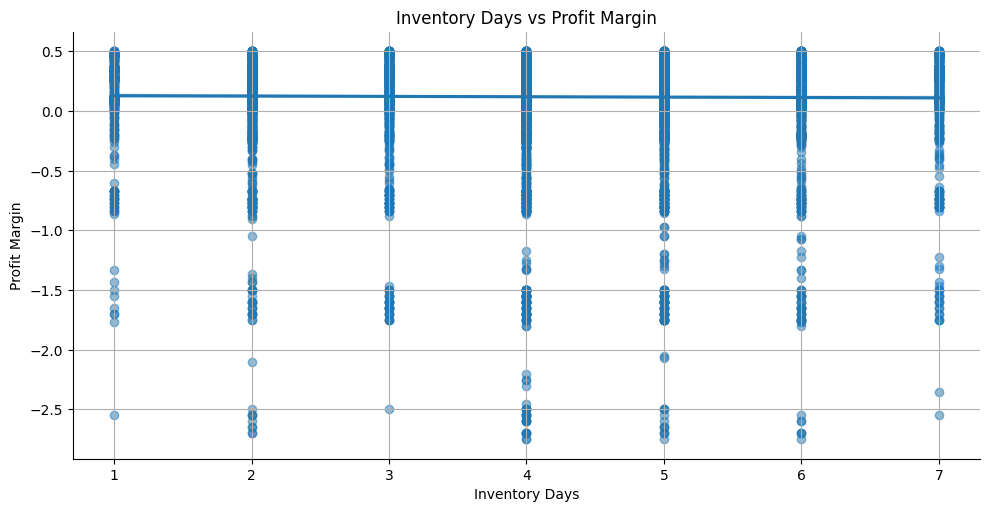

In [15]:
sns.lmplot(x='Inventory Days', y='Profit Margin', data=df, aspect=2, scatter_kws={'alpha':0.5})
plt.title('Inventory Days vs Profit Margin')
plt.grid(True)
plt.show()